# IBM Capstone Project

In [140]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline


### Get data from kaggle,


In [124]:
# The code was removed by Watson Studio for sharing.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Cleaning Time

In [125]:
print('Shape of the dataframe is: \n', dh.shape)
print('Columns of the dataframe include: \n', dh.columns)

Shape of the dataframe is: 
 (20640, 10)
Columns of the dataframe include: 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [126]:
dh.dropna(axis = 0, inplace = True)    ### Clean data, drop the row with NaN value
dh = dh.rename(columns = {'longitude':'long', 'latitude':'lat', 'housing_median_age':'age','total_rooms':'rooms','total_bedrooms':'bedrooms','population':'pop','median_income':'income','median_house_value':'price','ocean_proximity':'water'})

In [127]:
dhn = dh.sample(n = 10000)             #### Only randomly get 10000 samples from the 330000+ data, for quick reviewing
dhn.head()

,long,lat,age,rooms,bedrooms,pop,households,income,price,water
9070,-118.14,34.71,32.0,1164.0,248.0,588.0,270.0,1.1917,86900.0,INLAND
4380,-118.27,34.09,52.0,2327.0,555.0,1048.0,491.0,3.7847,252300.0,<1H OCEAN
14669,-117.12,32.78,4.0,2782.0,817.0,1309.0,787.0,4.2621,124200.0,NEAR OCEAN
5981,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072,121900.0,INLAND
20432,-118.74,34.25,25.0,1815.0,281.0,960.0,284.0,5.4243,214700.0,<1H OCEAN


In [128]:
dhn = dhn.drop(columns = ['water'])
dhn.head()

,long,lat,age,rooms,bedrooms,pop,households,income,price
9070,-118.14,34.71,32.0,1164.0,248.0,588.0,270.0,1.1917,86900.0
4380,-118.27,34.09,52.0,2327.0,555.0,1048.0,491.0,3.7847,252300.0
14669,-117.12,32.78,4.0,2782.0,817.0,1309.0,787.0,4.2621,124200.0
5981,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072,121900.0
20432,-118.74,34.25,25.0,1815.0,281.0,960.0,284.0,5.4243,214700.0


In [129]:
dh.dtypes  ## Check type of each columns, change object to int for future analysis

long          float64
lat           float64
age           float64
rooms         float64
bedrooms      float64
pop           float64
households    float64
income        float64
price         float64
water          object
dtype: object

In [130]:
dh.describe()

,long,lat,age,rooms,bedrooms,pop,households,income,price
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [72]:
dhn[['long', 'lat', 'age','rooms','bedrooms','pop','households','income','price']] = dhn[['long', 'lat', 'age','rooms','bedrooms','pop','households','income','price']].astype(int)

In [73]:
#### data normalization for totalPrice, square
maxPrice = max(dhn['price'])
dhn['price'] = dhn['price'] / maxPrice

### Visualize some basic trends

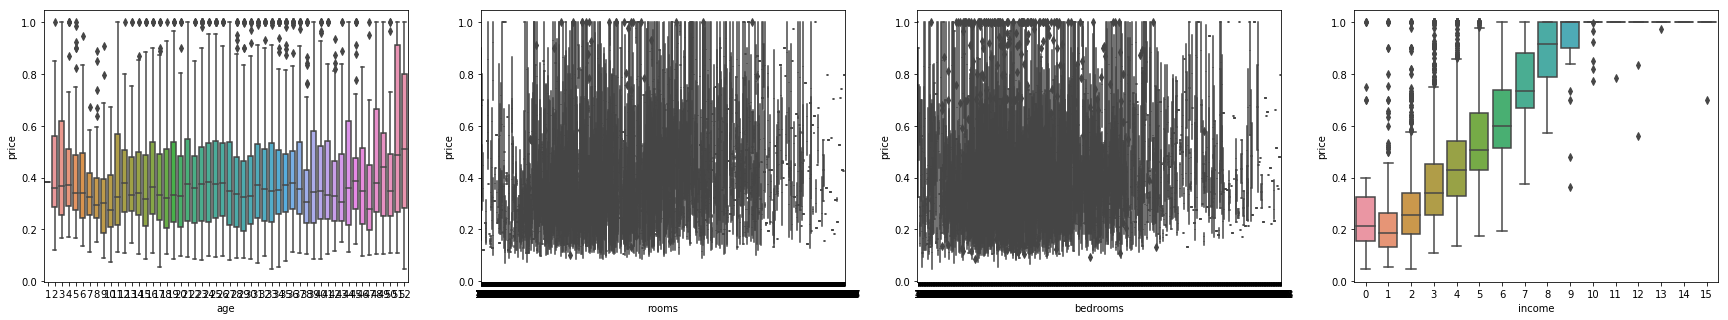

In [20]:
fig, axs = plt.subplots(ncols=4, figsize = (30,5))
sns.boxplot(x='age', y='price', data=dhn, ax=axs[0])
sns.boxplot(x='rooms', y='price', data=dhn, ax=axs[1])
sns.boxplot(x='bedrooms', y='price', data=dhn, ax=axs[2])
sns.boxplot(x='income', y='price', data=dhn, ax=axs[3])

Text(0, 0.5, 'Frequency')

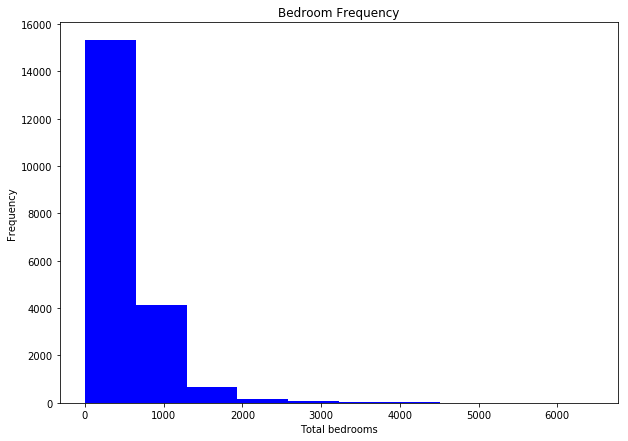

In [108]:
plt.figure(figsize=(10,7))
plt.hist(dh[dh['bedrooms'].notnull()]['bedrooms'],bins=10,color='blue')#histogram of bedrooms
#remove outliars
(dh['bedrooms']>4000).sum()
plt.title('Bedroom Frequency')
plt.xlabel('Total bedrooms')
plt.ylabel('Frequency')

In [109]:
def calcCategoricalMedian(x):
    """ fill the missing values of bedrooms based on categories of water"""
    uniqueWater=x['water'].unique()
    for i in uniqueWater:
        median=x[x['water']==i]['bedrooms'].median()
        x.loc[x['water']==i,'bedrooms'] =  x[x['water']==i]['bedrooms'].fillna(median)
calcCategoricalMedian(dh)

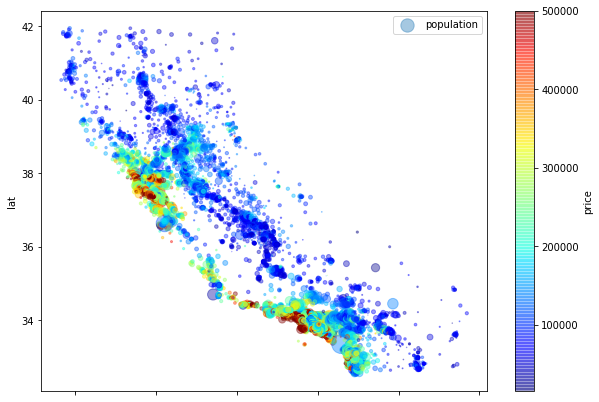

In [22]:
dh.plot(kind="scatter",x="long",y="lat",alpha=0.4,
             s=dh["pop"]/100,label="population",figsize=(10,7),
             c="price",cmap=plt.get_cmap("jet"),colorbar=True, 
            )
plt.legend()

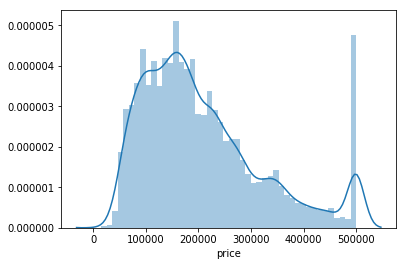

In [23]:
sns.distplot(dh.price)

[]

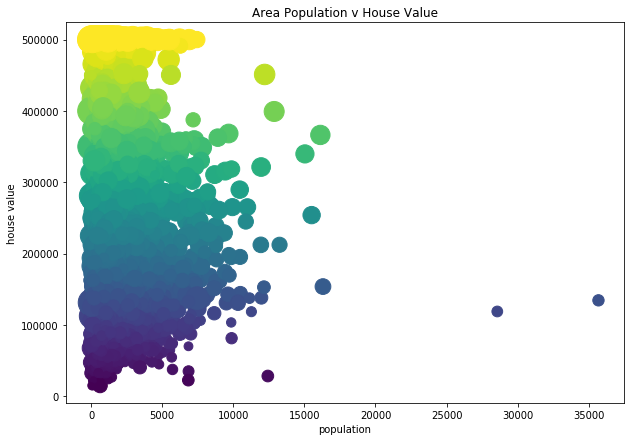

In [112]:
plt.figure(figsize=(10,7))

plt.scatter(dh['pop'],dh['price'],c=dh['price'],s=dh['income']*50)
plt.colorbar
plt.title('Area Population v House Value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

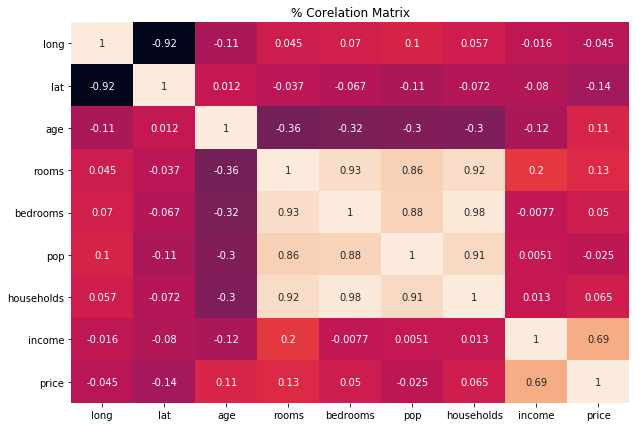

In [115]:
plt.figure(figsize=(10,7))
sns.heatmap(cbar=False,annot=True,data=dh.corr())
plt.title('% Corelation Matrix')
plt.show()

In [25]:
corrMatrix=dh.corr()
corrMatrix["price"].sort_values(ascending=False) 

price         1.000000
income        0.688355
rooms         0.133294
age           0.106432
households    0.064894
bedrooms      0.049686
pop          -0.025300
long         -0.045398
lat          -0.144638
Name: price, dtype: float64

[]

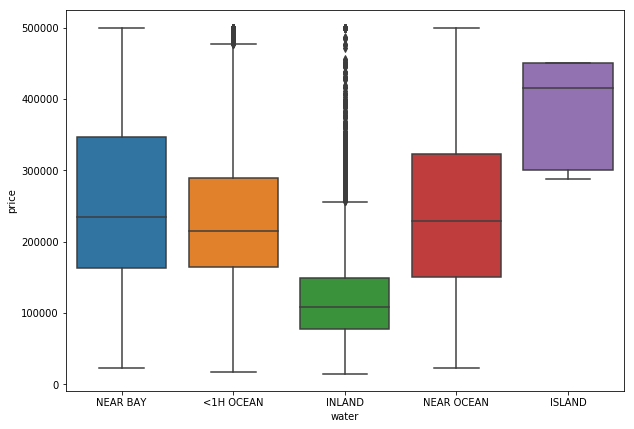

In [119]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dh,x='water',y='price')
plt.plot()

### Data Selection

In [131]:
dh=pd.concat([pd.get_dummies(dh['water'],drop_first=True),dh],axis=1).drop('water',axis=1)
dh['Income per Population']=dh['income']/(dh['pop']-dh['households'])
dh['Bedrooms per House']=dh['bedrooms']/dh['rooms']
dh['Houses per Population']=dh['households']/dh['pop']

In [132]:
def buildingType(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid age'
    else:
        return 'old'
df=pd.concat([dh,pd.get_dummies(dh['age'].apply(buildingType),drop_first=True)],axis=1)

In [133]:
x=dh.drop('price',axis=1).values
y=dh['price'].values

### more cleaing

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

number of training samples: 14303
number of test samples: 6130


In [137]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_train=ms.fit_transform(x_train)
x_test=ms.transform(x_test)

In [141]:
def variance(x):
    total=0
    hlist=[]
    for i in np.arange(0,x_train.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        hlist.append(total)
        
    return hlist
xtrainvariance=list(map(lambda x:x*100,variance(x_train)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

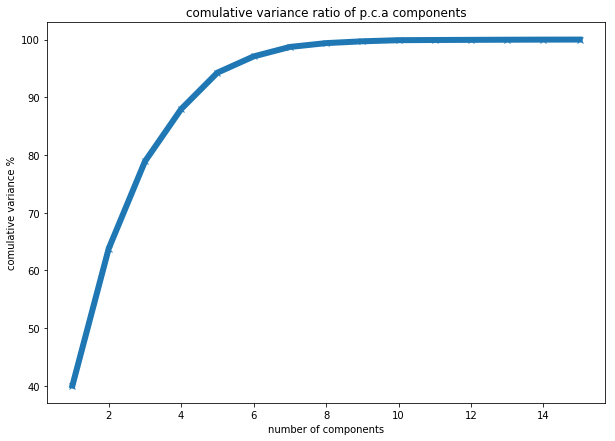

In [143]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,x_train.shape[1]+1),xtrainvariance,marker='x',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

In [146]:
pca=PCA(n_components=2)
pca.fit(x_train)
ptrain=pca.fit_transform(x_train)

In [77]:
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_)

[[-5.41718734e-02 -5.53742838e-02  2.53216110e-03 -2.07190266e-05
   1.82197510e-04 -8.15636369e-05  1.86152724e-04  8.31070357e-02]]


In [148]:
bestk=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(x_train)
    bestk.append(k.inertia_)

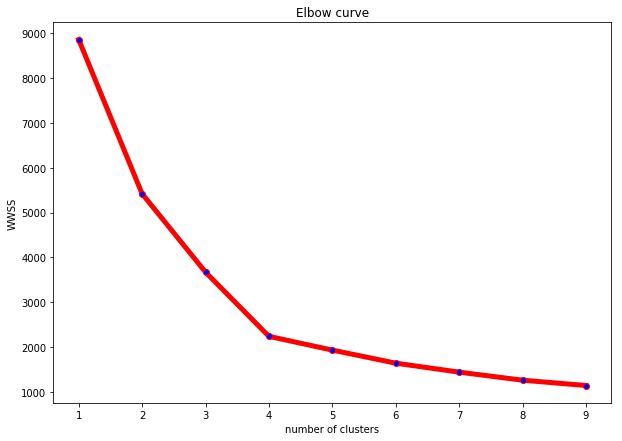

In [151]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,len(bestk)+1),bestk,marker='o',markerfacecolor='blue',lw=5,color='red')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WWSS')
plt.show()

In [160]:
k=KMeans(n_clusters=4)
kpred=k.fit_predict(x_train)

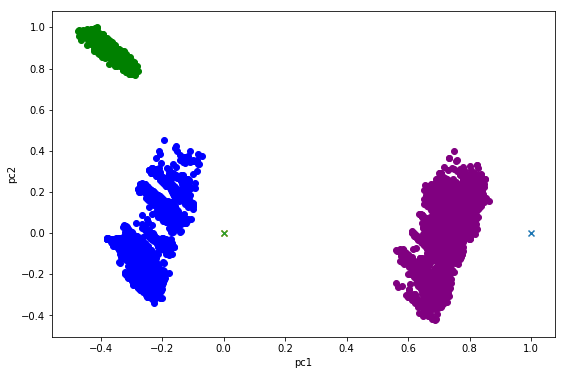

In [161]:
plt.figure(figsize=(9,6))
color=['purple','blue','green','pink']
for i in range(3):
    plt.scatter(ptrain[kpred==i][:,0],ptrain[kpred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

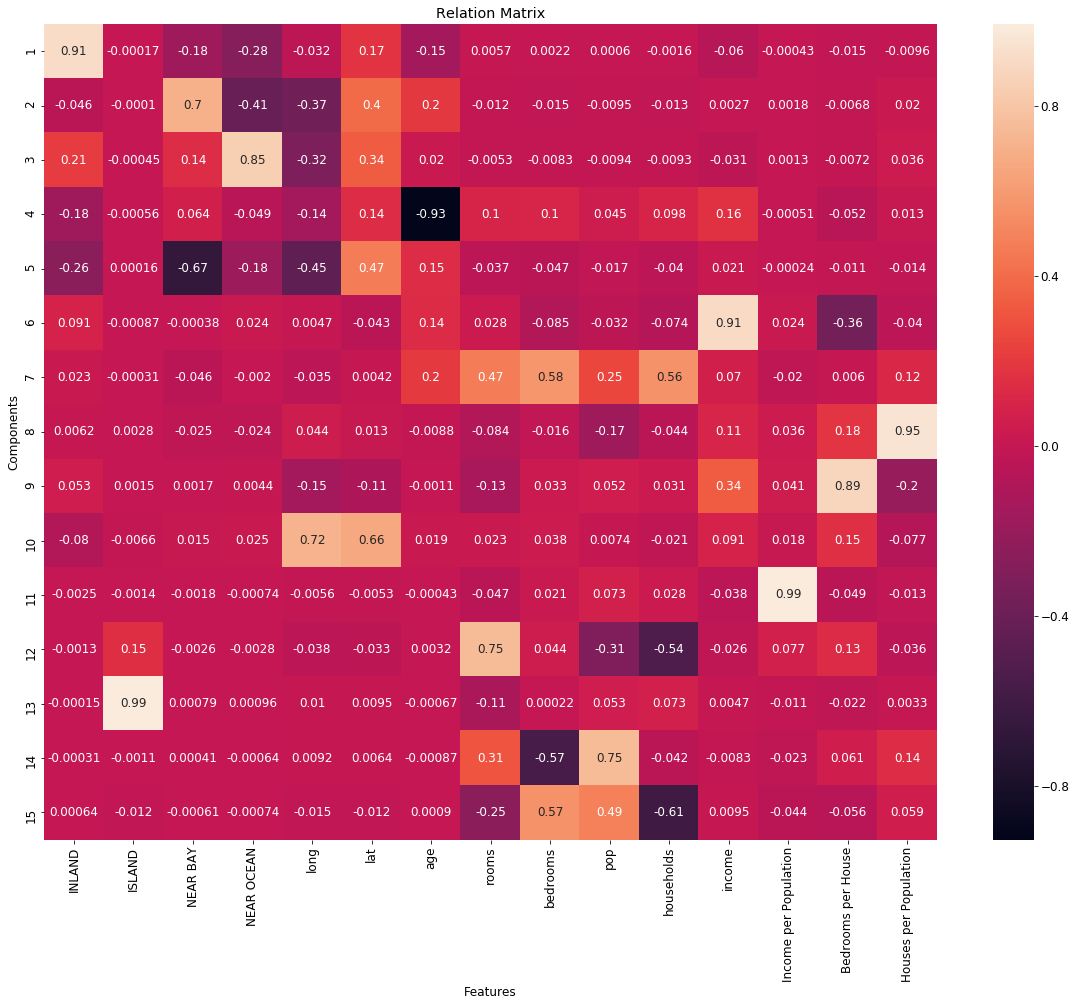

In [163]:
matplotlib.rcParams.update({'font.size': 12})
pca=PCA(n_components=None)
pca.fit(x_train)
plt.figure(figsize=(20,15))
sns.heatmap(pca.components_,annot=True,xticklabels=dh.drop('price',axis=1).columns,yticklabels=[str(i) for i in range(1,len(dh.columns))])
plt.xlabel('Features')
plt.ylabel('Components')
plt.title('Relation Matrix')
plt.show()
matplotlib.rcParams.update({'font.size': 10})

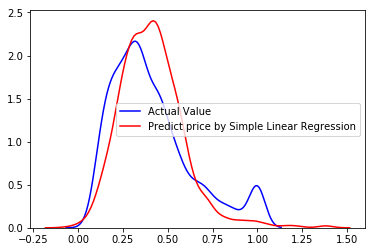

In [78]:
### predict by using x_test
yhat_lm = lm.predict(x_test)
ax1 = sns.distplot(y_test, hist= False, color='b', label = "Actual Value")
sns.distplot(yhat_lm, hist=False, color = "r", label ="Predict price by Simple Linear Regression", ax=ax1)

In [79]:
print('MSE for SLR is: ', mean_squared_error(y_test, yhat_lm))
print('R score for SLR is: ', lm.score(x_test, y_test))

MSE for SLR is:  0.02050405680952698
R score for SLR is:  0.6033395900255456


### A PolyRegression Model

In [81]:
Rsqu_test = [] ## create empty list
order =[1,2,3,4]    ## contains different polynomial orders
for n in order:
	pr = PolynomialFeatures(degree = n)
	x_train_pr =pr.fit_transform(x_train)
	x_test_pr = pr.fit_transform(x_test)
	lm.fit(x_train_pr, y_train)
	Rsqu_test.append(lm.score(x_test_pr, y_test))
print('R square score for different polynomial orders are: ',Rsqu_test)

R square score for different polynomial orders are:  [0.6024844442712274, 0.6458103780696401, 0.5927603088401524, -0.9353588235665633]


In [168]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

In [169]:
def topoly(degree,x_train,x_test):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(x_train)
    x=poly.fit_transform(x_test)
    return (X,x)

In [171]:
def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()

The cross validated accuracy  - -2.2531584133908388e+18
The corss validated variance is - 6.431388043116912e+18
root mean squared error for test data   is 11441301857556.082


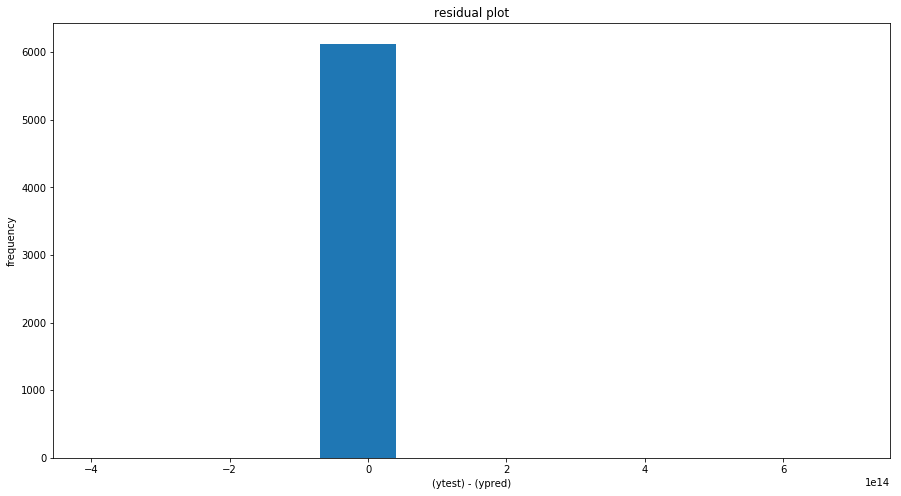

In [176]:
xtrainpoly,xtestpoly=topoly(3,x_train,x_test)
l=regresssor_model(xtrainpoly,y_train,LinearRegression)
evaluate(l.predict(xtestpoly),y_test,l)

The cross validated accuracy  - 47.833543125938206
The corss validated variance is - 2.062189259722317
root mean squared error for test data   is 83697.07455224254


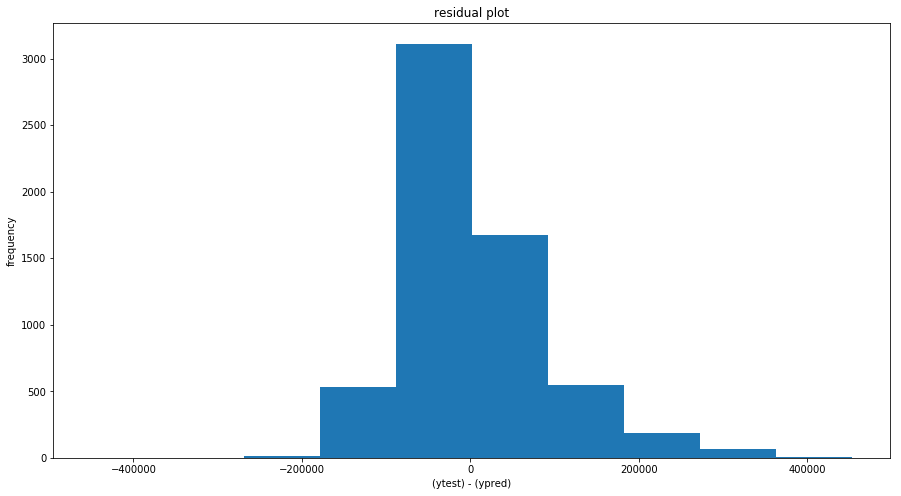

In [172]:
xtrainpoly,xtestpoly=topoly(2,x_train[:,11:12],x_test[:,11:12])
l=regresssor_model(xtrainpoly,y_train,LinearRegression)
evaluate(l.predict(xtestpoly),y_test,l)

### A ridge model

The cross validated accuracy  - 67.57409882146209
The corss validated variance is - 1.5284806487423972
root mean squared error for test data   is 65254.66757522146


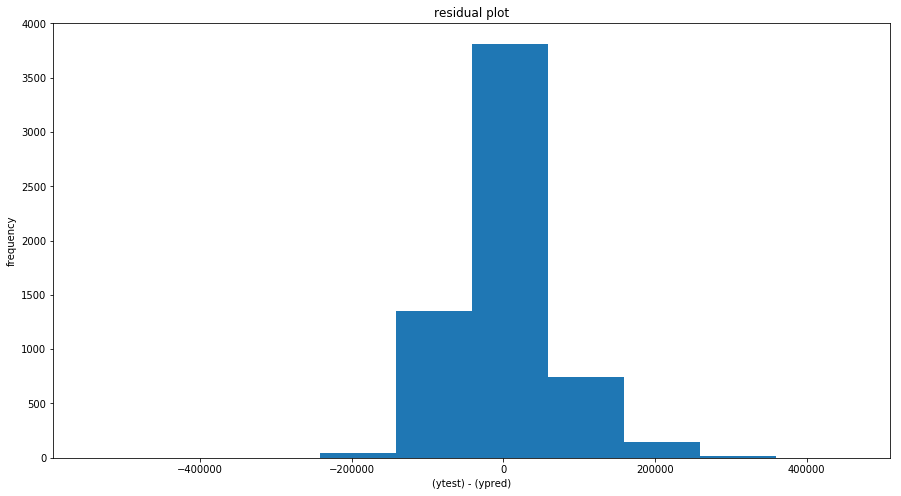

Text(0.5, 1.0, 'coeff graph')

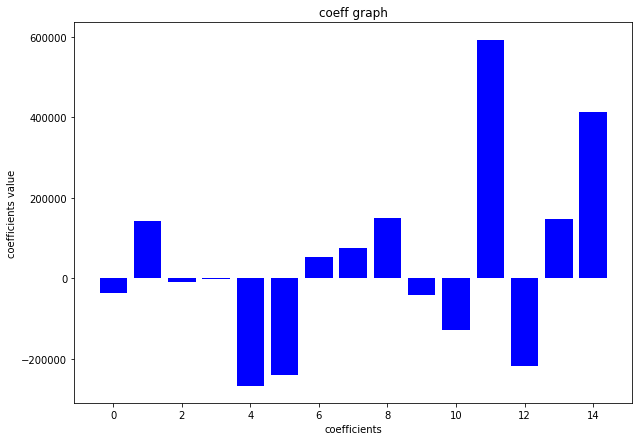

In [178]:
check =regresssor_model(x_train,y_train,Ridge)
evaluate(check.predict(x_test),y_test,check)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(check.coef_)),check.coef_,color='blue')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

MSE for RidgeModel is:  0.020548260496395115
R score for RidgeModel is:  0.6024844493712653


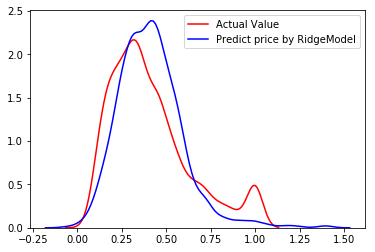

In [82]:
RidgeModel = Ridge(alpha = 0.01)
RidgeModel.fit(x_train,y_train)
yhat_ridge = RidgeModel.predict(x_test)


print('MSE for RidgeModel is: ', mean_squared_error(y_test, yhat_ridge))
print('R score for RidgeModel is: ', RidgeModel.score(x_test, y_test))

### predict by using x_test
ax2 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge, hist=False, color = "b", label ="Predict price by RidgeModel", ax=ax2)

### For polynomial ridgeModel

MSE for RidgeModel-poly is:  0.018308419519454486
R score for RidgeModel-poly is:  0.6458152033017774


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.64223e-22): result may not be accurate.
  overwrite_a=True).T


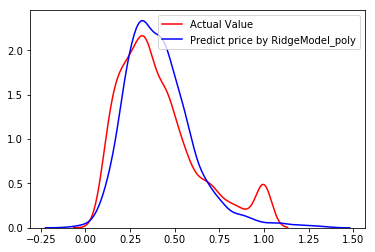

In [93]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_poly = Ridge(alpha = 0.01)
RidgeModel_poly.fit(x_train_pr, y_train)
yhat_ridge_poly = RidgeModel_poly.predict(x_test_pr)

print('MSE for RidgeModel-poly is: ', mean_squared_error(y_test, yhat_ridge_poly))
print('R score for RidgeModel-poly is: ', RidgeModel_poly.score(x_test_pr, y_test))

### predict by using x_test
ax3 = sns.distplot(y_test, hist= False, color='r', label = "Actual Value")
sns.distplot(yhat_ridge_poly, hist=False, color = "b", label ="Predict price by RidgeModel_poly", ax=ax3)

In [100]:
dffs = dh.sample(n = 500) 

### Decision Trees

In [179]:
dtree=regresssor_model(x_train,y_train,DecisionTreeRegressor)
dtree.fit(x_train,y_train)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(y_test,dtree.predict(x_test)))

The cross validated accuracy  - 61.98096847704557
The corss validated variance is - 3.397721190211972
mean squared errror is	-

71605.83466898324

In [186]:
par=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dtree,par,cv=10,scoring='r2',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=70, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [187]:
gc.best_score_
dt=gc.best_estimator_
dt.fit(x_train,y_train)
np.sqrt(mean_squared_error(y_test,dtree.predict(x_test)))

71605.83466898324

Text(0.5, 1.0, 'feature importance')

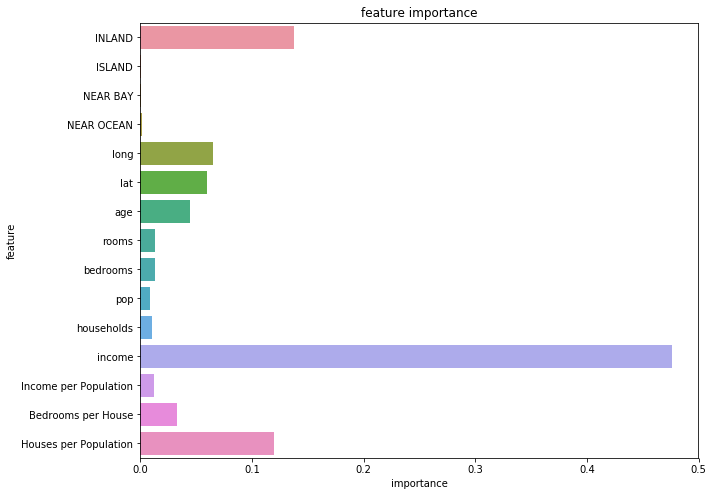

In [188]:
plt.figure(figsize=(10,8))
data=pd.DataFrame({'feature':dh.columns[dh.columns!='price'].values,"importance":dtree.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')